### Aim = Logistic Regression with Neural Network mindset

In [7]:
import numpy as np # For numerical operations
import pandas as pd # For handling tabular data               
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For beautiful scatter plots    
from sklearn.datasets import make_classification # For generating synthetic data 
from sklearn.model_selection import train_test_split # For splitting dataset 
from sklearn.preprocessing import StandardScaler # For feature scaling    
import tensorflow as tf # For building logistic regression model       

In [8]:
# Generate synthetic dataset simulating student scores and placements
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           class_sep=1.5, flip_y=0.02, random_state=42)

# Save unscaled data for plotting
X_orig = X.copy()
# Convert to DataFrame with meaningful column names
df = pd.DataFrame(X_orig, columns=['CGPA', 'Internship_Score'])
df['Placement_Status'] = y
# View first few records of the dataset
df.head()


,CGPA,Internship_Score,Placement_Status
0,2.186782,0.688474,1
1,2.312657,0.898094,1
2,1.306838,1.764684,1
3,0.571282,-2.061898,0
4,2.049571,-1.273692,0


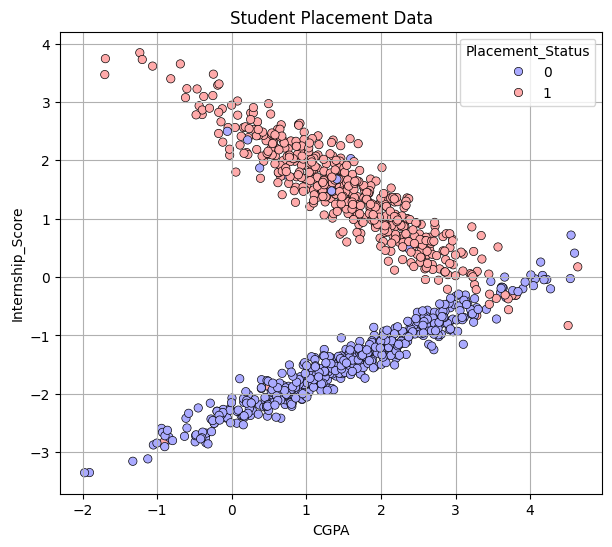

In [9]:
# Plot the distribution of placed and not placed students using CGPA and internship scores
plt.figure(figsize=(7, 6))
sns.scatterplot(data=df, x='CGPA', y='Internship_Score', hue='Placement_Status', palette='bwr', edgecolor='k')
plt.title("Student Placement Data")
plt.grid(True)
plt.show()

In [10]:
# Split the dataset into training and testing sets (80-20 split), preserving class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Standardize features to zero mean and unit variance for better model convergence
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Define a logistic regression model using Keras Sequential API
# Input layer with 2 features
# Output layer with sigmoid activation for binary classification
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),                      
    tf.keras.layers.Dense(1, activation='sigmoid')])
# Compile the model with binary cross entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model for 50 epochs (iterations over data)
model.fit(X_train_scaled, y_train, epochs=50, verbose=0)

In [12]:
# Evaluate model performance on test data and print accuracy
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")



Test Accuracy: 94.00%


### Conclusion
In this practical, we implemented a binary classification model using logistic regression. The model was trained on synthetically generated student placement data and achieved high accuracy. Visualizations helped build clear intuition on how well the model is separating the classes.
